In [1]:
!pip install xgboost

In [2]:
import xgboost as xgb
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
raw_dataset = pd.read_csv('FL_G_dataset-PTC.csv')

x = raw_dataset.iloc[:, : -1].values
y = raw_dataset.iloc[:, 11].values
raw_dataset

,DAT(days),Temp,WC,NL,N(PTC) (mg/g),P(PTC) (mg/g),K(PTC) (mg/g),Ca(PTC) (mg/g),Mg(PTC) (mg/g),S(PTC) (mg/g),Na(PTC) (mg/g),Diameter of Bulb(mm)
0,1,18.3,0.11,6.88,33.55,4.91,37.29,7.25,2.14,1.93,0.77,17.62
1,2,19.8,0.12,6.95,34.11,5.10,38.20,726.00,2.15,1.94,0.78,17.73
2,3,18.3,0.13,7.00,35.63,5.12,39.41,7.27,2.16,1.95,0.79,17.81
3,4,16.9,0.14,7.08,36.28,5.34,40.56,7.28,2.17,1.96,0.80,17.95
4,6,18.9,0.15,7.17,37.19,5.42,41.72,7.29,2.18,1.97,0.82,18.06
...,...,...,...,...,...,...,...,...,...,...,...,...
86,89,29.5,16.29,12.71,35.76,7.10,49.88,10.47,1.58,3.21,1.08,24.95
87,90,27.9,16.32,12.78,35.61,7.11,49.76,10.48,1.59,3.22,1.07,25.64
88,91,27.1,16.39,12.82,35.55,7.12,48.53,10.49,1.60,3.23,1.06,27.83
89,92,26.1,16.44,12.85,35.19,7.13,48.31,10.50,1.61,3.24,1.05,28.24


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)


In [5]:
%%time
xgbr = xgb.XGBRegressor(verbosity=0)
#print(xgbr)

xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
r2 = 1 - sum((ytest - ypred) ** 2)/sum((ytest - np.mean(ytest)) ** 2)
#r2 = r2_score(ytest,ypred)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))



Training score:  0.999999840568407
Mean cross-validation score: 0.90
K-fold CV average score: 0.94
MSE: 0.04
RMSE: 0.21
Wall time: 1.34 s


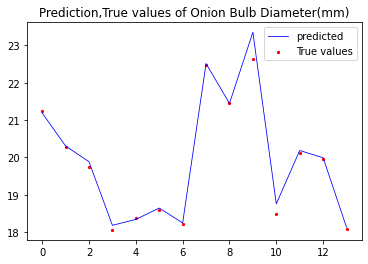

In [6]:
x_ax = range(len(ytest))
plt.title('Prediction,True values of Onion Bulb Diameter(mm)')
plt.scatter(x_ax, ytest, s=5, color="red", label="True values")
plt.plot(x_ax, ypred, lw=0.8, color="blue", label="predicted")
plt.legend()
plt.show()

In [7]:
print('ypred =',ypred)

ypred = [21.189623 20.307638 19.885021 18.183382 18.340986 18.645422 18.24661
 22.5127   21.445934 23.351028 18.75687  20.186325 19.990688 18.130308]


In [8]:
print('r2_score = ',r2)

r2_score =  0.9815776777371286
